In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [84]:
products = pd.read_csv('source/product_data.csv')
behavior = pd.read_csv('source/user_behavior_data.csv')
users = pd.read_csv('source/user_data.csv')
ratings = pd.read_csv('source/user_ratings.csv')

# Users

In [4]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1000 non-null   int64 
 1   age        1000 non-null   int64 
 2   gender     1000 non-null   object
 3   location   1000 non-null   object
 4   join_date  1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


,user_id,age,gender,location,join_date
0,1001,56,M,Port Kevinmouth,2022-02-16
1,1002,69,M,West Johnport,2023-06-02
2,1003,46,M,Brianstad,2023-10-17
3,1004,32,F,Wilsonmouth,2022-05-31
4,1005,60,M,North Robert,2022-09-24


### Age Distribution

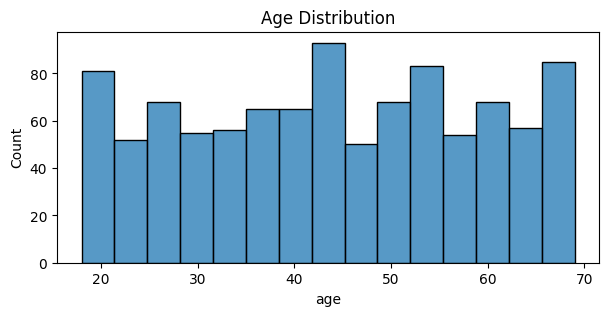

In [142]:
plt.figure(figsize=(7, 3))
sns.histplot(users['age'], bins=15)
plt.title('Age Distribution')
plt.show()


### Gender Distribution

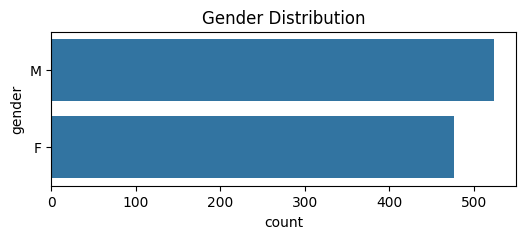

In [15]:
plt.figure(figsize=(6, 2))
sns.countplot(users['gender'])
plt.title('Gender Distribution')
plt.show()

### User Tenure Distribution

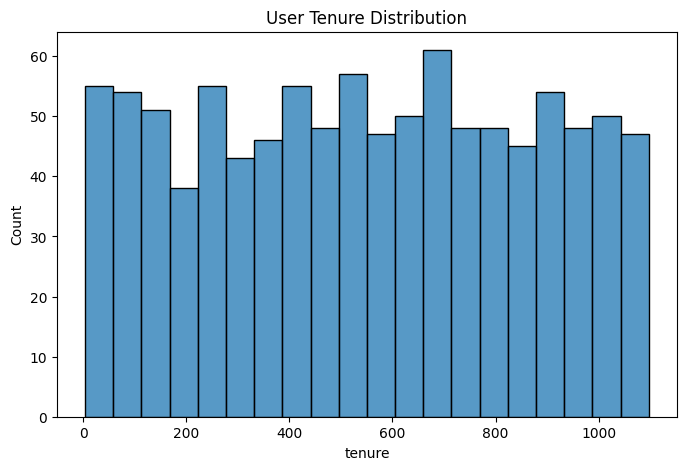

In [141]:
users['join_date'] = pd.to_datetime(users['join_date'])
users['tenure'] = (pd.to_datetime('today') - users['join_date']).dt.days

plt.figure(figsize=(8, 5))
sns.histplot(users['tenure'], bins=20)
plt.title('User Tenure Distribution')
plt.show()

# Products

In [18]:
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  1000 non-null   int64  
 1   category    1000 non-null   object 
 2   price       1000 non-null   float64
 3   brand       1000 non-null   object 
 4   avg_rating  1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


,product_id,category,price,brand,avg_rating
0,2001,Electronics,605.47,Padilla Ltd,3.1
1,2002,Clothing,678.09,"Miller, Miller and Sparks",4.6
2,2003,Food,805.96,Green Inc,4.6
3,2004,Home & Kitchen,273.47,"Stevens, Contreras and Robinson",4.3
4,2005,Health,825.92,Gamble-Waters,3.0


**Note**: Avg Rating should be computed as the average of all the ratings given by the user and should be computed on the fly, as the ratings update frequently.

### Category Distribution

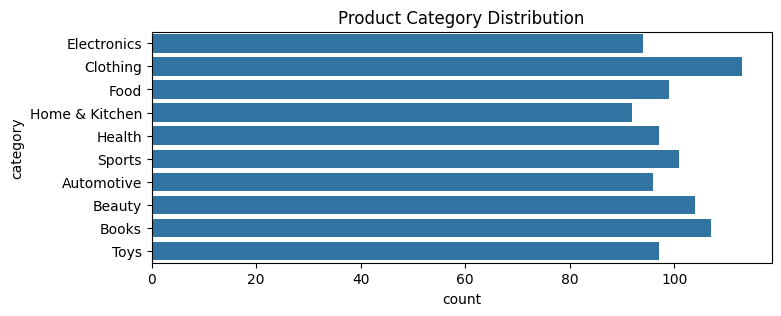

In [25]:
plt.figure(figsize=(8, 3))
sns.countplot(products['category'])
plt.title('Product Category Distribution')
plt.show()

### Price Distribution

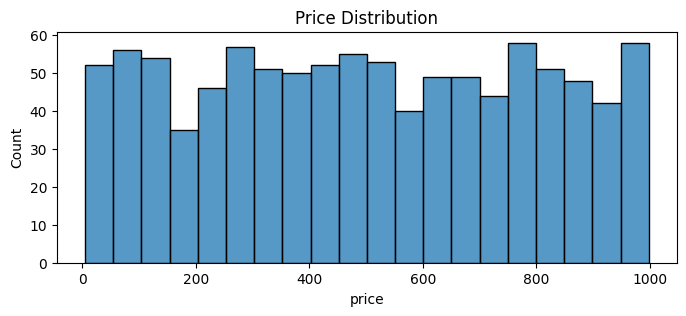

In [26]:
plt.figure(figsize=(8, 3))
sns.histplot(products['price'], bins=20)
plt.title('Price Distribution')
plt.show()

### Average Rating Distribution

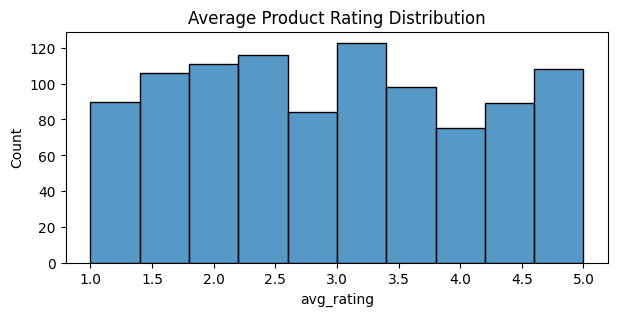

In [139]:
plt.figure(figsize=(7, 3))
sns.histplot(products['avg_rating'], bins=10)
plt.title('Average Product Rating Distribution')
plt.show()

Check if "avg_rating" matches the mean of the ratings for the products.

In [45]:
new_avg_ratings = ratings.groupby('product_id')['rating'].mean().reset_index()
new_avg_ratings.rename(columns={'rating': 'new_avg_rating'}, inplace=True)

products = products.merge(new_avg_ratings, on='product_id', how='left')

mae = abs(products['avg_rating'] - products['new_avg_rating']).mean()
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 1.31


In [49]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   category        1000 non-null   object 
 2   price           1000 non-null   float64
 3   brand           1000 non-null   object 
 4   avg_rating      1000 non-null   float64
 5   new_avg_rating  869 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 47.0+ KB


Only 86 products have been rated by users. This is a more realistic scenario where not all products have been rated by users. To avoid any data inconsistencies, we will use the new average ratings.

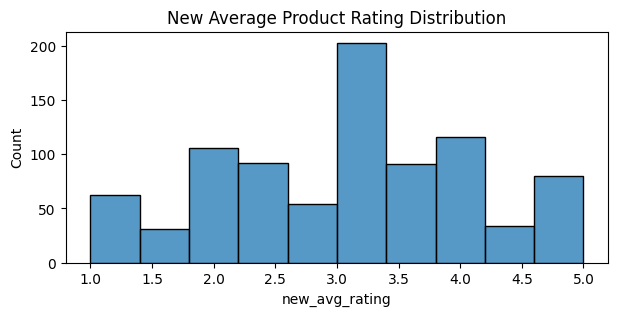

In [50]:
plt.figure(figsize=(7, 3))
sns.histplot(products['new_avg_rating'], bins=10)
plt.title('New Average Product Rating Distribution')
plt.show()

# User Behaviour

In [86]:
behavior.info()
behavior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             5000 non-null   int64 
 1   product_id          5000 non-null   int64 
 2   view_timestamp      5000 non-null   object
 3   purchase_timestamp  1498 non-null   object
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


,user_id,product_id,view_timestamp,purchase_timestamp
0,1493,2130,2024-05-28 18:31:49.847463,NaN
1,1634,2871,2024-02-02 10:15:10.416678,NaN
2,1375,2582,2024-08-10 07:45:55.252928,NaN
3,1099,2594,2024-07-29 13:59:53.452149,2024-07-30 04:15:53.452149
4,1192,2325,2024-02-12 15:07:41.174795,2024-02-13 07:07:41.174795


In [87]:
counts = behavior.groupby(['user_id', 'product_id']).size().reset_index(name='count')
counts['count'].value_counts()

count
1    4974
2      13
Name: count, dtype: int64

There are user interactions having the same user and product. It would be useful to have a full user_interaction dataframe aggregating all information (both explicit - rating, and implicit - behavior)

### More features

In [94]:
behavior['view_timestamp'] = pd.to_datetime(behavior['view_timestamp'])
behavior['purchase_timestamp'] = pd.to_datetime(behavior['purchase_timestamp'])

behavior['view_to_purchase_time'] = (behavior['purchase_timestamp'] - behavior['view_timestamp']).dt.total_seconds() // 3600  # in hours
behavior['purchase_day'] = behavior['purchase_timestamp'].dt.day_of_week
behavior['purchase_hour'] = behavior['purchase_timestamp'].dt.hour

In [90]:
behavior.head()

,user_id,product_id,view_timestamp,purchase_timestamp,view_to_purchase_time,purchase_day,purchase_hour
0,1493,2130,2024-05-28 18:31:49.847463,NaT,NaN,NaN,NaN
1,1634,2871,2024-02-02 10:15:10.416678,NaT,NaN,NaN,NaN
2,1375,2582,2024-08-10 07:45:55.252928,NaT,NaN,NaN,NaN
3,1099,2594,2024-07-29 13:59:53.452149,2024-07-30 04:15:53.452149,14.0,1.0,4.0
4,1192,2325,2024-02-12 15:07:41.174795,2024-02-13 07:07:41.174795,16.0,1.0,7.0


### View-to-Purchase Distribution

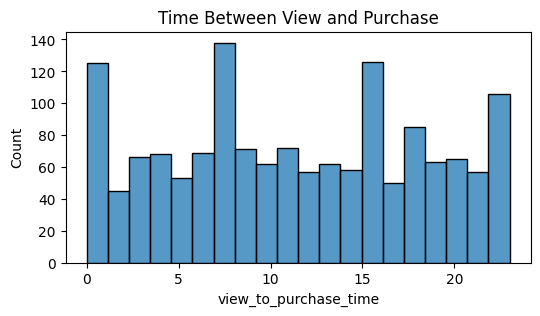

In [137]:
plt.figure(figsize=(6, 3))
sns.histplot(behavior['view_to_purchase_time'], bins=20)
plt.title('Time Between View and Purchase')
plt.show()

### Purchase Day of Week Distribution

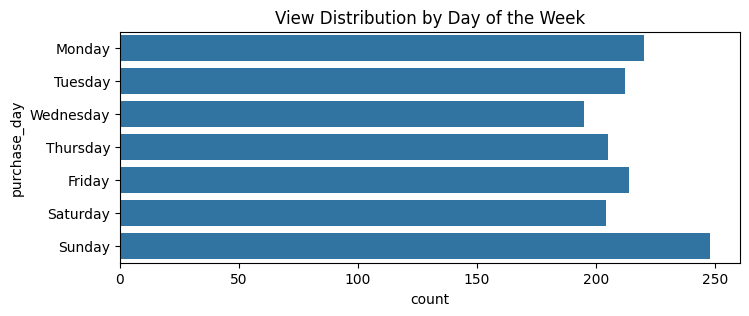

In [114]:
day_of_week = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

plt.figure(figsize=(8, 3))
sns.countplot(behavior['purchase_day'].round(0).map(day_of_week), order=day_of_week.values())
plt.title('Purchase Distribution by Day of the Week')
plt.show()

### Purchase Hour Distribution

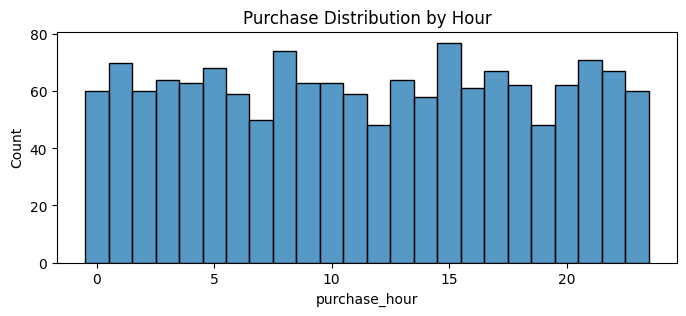

In [135]:
plt.figure(figsize=(8, 3))
sns.histplot(behavior['purchase_hour'], bins=24, discrete=True)
plt.title('Purchase Distribution by Hour')
plt.show()

# Ratings

In [122]:
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     2000 non-null   int64 
 1   product_id  2000 non-null   int64 
 2   rating      2000 non-null   int64 
 3   timestamp   2000 non-null   object
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


,user_id,product_id,rating,timestamp
0,1310,2017,2,2023-12-09 05:35:56.069071
1,1280,2913,4,2024-02-22 17:15:33.495224
2,1726,2710,3,2024-07-24 11:42:07.535739
3,1524,2622,5,2024-01-17 10:48:35.135427
4,1901,2640,4,2024-06-12 14:32:48.824044


In [123]:
counts = ratings.groupby(['user_id', 'product_id']).size().reset_index(name='count')
counts['count'].value_counts()

count
1    1998
2       1
Name: count, dtype: int64

A user reviewd the same product twice $\rightarrow$ keep only the last review

### Data Integrity

In [127]:
ratings = ratings.sort_values(['user_id', 'product_id', 'timestamp'], ascending=[True, True, False])
ratings = ratings.drop_duplicates(subset=['user_id', 'product_id'], keep='first')

counts = ratings.groupby(['user_id', 'product_id']).size().reset_index(name='count')
counts['count'].value_counts()

count
1    1999
Name: count, dtype: int64

### More features

In [144]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings['recency'] = (pd.to_datetime('today') - ratings['timestamp']).dt.days

### Ratings Distribution

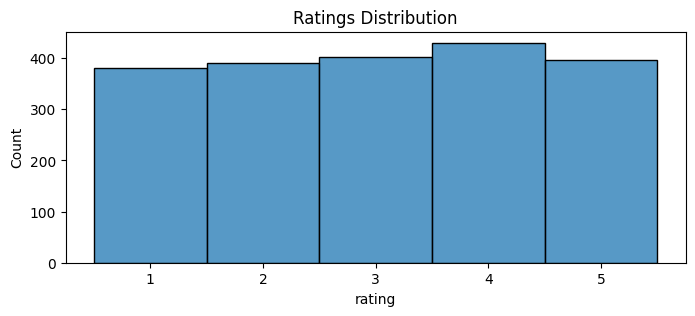

In [145]:
plt.figure(figsize=(8, 3))
sns.histplot(ratings['rating'], bins=5, discrete=True)
plt.title('Ratings Distribution')
plt.show()

### Ratings Recency Distribution

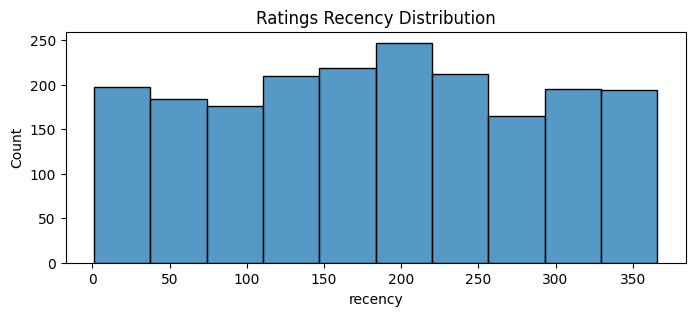

In [146]:
plt.figure(figsize=(8, 3))
sns.histplot(ratings['recency'], bins=10)
plt.title('Ratings Recency Distribution')
plt.show()